# 1. Import Dependencies

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# 2. Data collection and processing

In [313]:
car_dataset = pd.read_csv("car_data.csv")

In [314]:
car_dataset.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
252,brio,2015,5.40,6.82,31427,Petrol,Dealer,Automatic,0
45,ciaz,2014,7.50,12.04,15000,Petrol,Dealer,Automatic,0
147,Yamaha FZ S V 2.0,2015,0.55,0.84,58000,Petrol,Individual,Manual,0
184,Bajaj Pulsar 150,2008,0.25,0.75,26000,Petrol,Individual,Manual,1
217,eon,2016,3.15,4.43,15000,Petrol,Dealer,Manual,0


In [315]:
car_dataset["Selling_Price"] = car_dataset.pop("Selling_Price")

In [316]:
car_dataset.sample(5)

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
72,corolla altis,2013,18.61,56001,Petrol,Dealer,Manual,0,7.45
219,verna,2012,9.40,36000,Petrol,Dealer,Manual,0,4.50
12,ciaz,2015,9.94,15000,Petrol,Dealer,Automatic,0,7.50
180,Hero Honda Passion Pro,2012,0.51,60000,Petrol,Individual,Manual,0,0.30
262,amaze,2015,5.80,40023,Petrol,Dealer,Manual,0,4.00


In [317]:
print(car_dataset.shape)

(301, 9)


In [318]:
car_dataset.dtypes

Car_Name          object
Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
Selling_Price    float64
dtype: object

In [319]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
Selling_Price    0
dtype: int64

there's no null values

In [320]:
car_dataset.duplicated().sum()

np.int64(2)

there's no duplicated values

In [321]:
car_dataset.columns.to_list()

['Car_Name',
 'Year',
 'Present_Price',
 'Driven_kms',
 'Fuel_Type',
 'Selling_type',
 'Transmission',
 'Owner',
 'Selling_Price']

In [322]:
car_dataset_selected_cols = list(car_dataset.select_dtypes("object").columns)
print(car_dataset_selected_cols)

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']


In [323]:
for col in car_dataset_selected_cols:
    array = car_dataset[col].unique()
    print(col, ":", end="\n")
    print(f"length of {col} is: {len(array)}")
    print(array, end="\n")

Car_Name :
length of Car_Name is: 98
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'B

In [324]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Present_Price  301 non-null    float64
 3   Driven_kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Selling_Price  301 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [325]:
for col in car_dataset_selected_cols[1:]:
    print(car_dataset[col].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [326]:
car_dataset.replace({
    "Fuel_Type":{
        "Petrol": 0,
        "Diesel": 1,
        "CNG": 2
    }
}, inplace=True)
car_dataset.replace({
    "Selling_type":{
        "Dealer": 0,
        "Individual": 1,
    }
}, inplace=True)
car_dataset.replace({
    "Transmission":{
        "Manual": 0,
        "Automatic": 1,
    }
}, inplace=True)

C:\Users\ADM\AppData\Local\Temp\ipykernel_36932\674425391.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({
C:\Users\ADM\AppData\Local\Temp\ipykernel_36932\674425391.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({
C:\Users\ADM\AppData\Local\Temp\ipykernel_36932\674425391.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [327]:
for col in car_dataset_selected_cols[1:]:
    print(car_dataset[col].unique())

[0 1 2]
[0 1]
[0 1]


# 3. Splitting the data and target

In [328]:
x = car_dataset.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_dataset["Selling_Price"]

In [329]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

In [330]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# 4. Splitting Training and Test data

In [331]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

# 5. Model Training

## 5.1. Linear regression model

In [332]:
lin_reg_model = LinearRegression()

In [333]:
lin_reg_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 5.1.1 Model Evaluation

In [334]:
training_data_prediction = lin_reg_model.predict(x_train)

In [335]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8796483009370206


In [336]:
test_data_prediction = lin_reg_model.predict(x_test)

In [337]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)
mae = metrics.mean_absolute_error(y_test, test_data_prediction)
print("MAE:", mae)
mse = metrics.mean_squared_error(y_test, test_data_prediction)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


R squared Error :  0.8365861023208371
MAE: 1.1514570443979941
RMSE: 1.4662898211089381


### 5.1.2. Visualize the actual prices and predicted prices

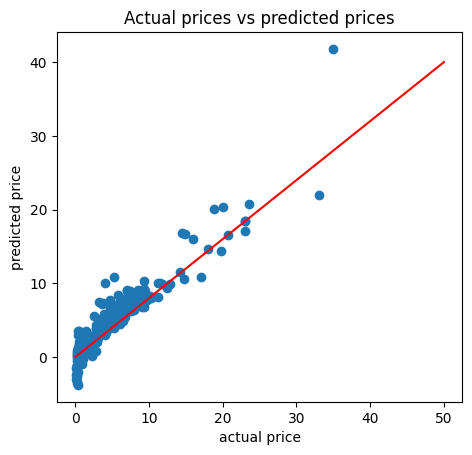

In [338]:
ax = plt.axes(aspect="equal")
plt.scatter(y_train, training_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
_ = plt.plot([0, 50], [0, 40], c = "red")

the scatter shows that the actual price and the predicted price are close in small values and once the price value increases there's soome gap because there are less values greater than 10 in our dataset

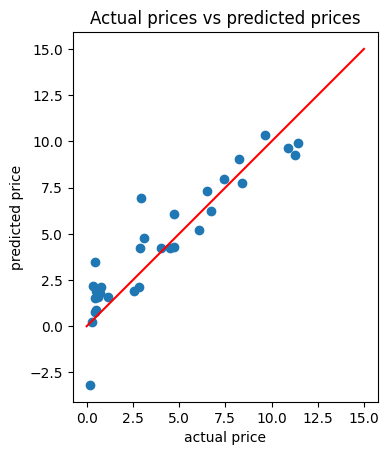

In [339]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, test_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
_ = plt.plot([0, 15], [0, 15], c = "red")

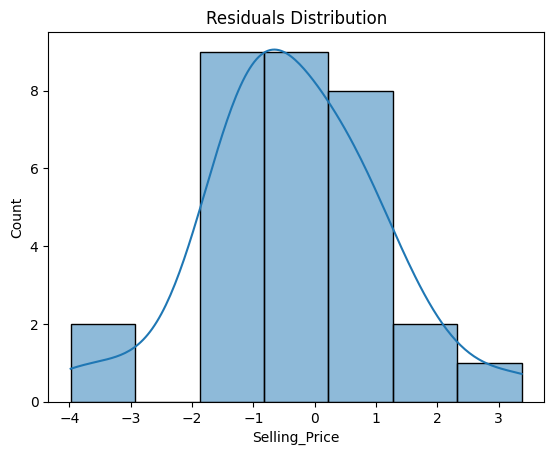

In [340]:
residuals = y_test - test_data_prediction
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()

## 5.2. Lasso regression model

In [341]:
lasso_reg_model = Lasso()

In [342]:
lasso_reg_model.fit(x_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


### 5.2.1 Model Evaluation

In [343]:
training2_data_prediction = lasso_reg_model.predict(x_train)

In [344]:
error_score = metrics.r2_score(y_train, training2_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8424480718240743


In [345]:
test2_data_prediction = lasso_reg_model.predict(x_test)

In [346]:
error_score = metrics.r2_score(y_test, test2_data_prediction)
print("R squared Error : ", error_score)
mae = metrics.mean_absolute_error(y_test, test2_data_prediction)
print("MAE:", mae)
mse = metrics.mean_squared_error(y_test, test2_data_prediction)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

R squared Error :  0.8709763132343395
MAE: 1.050559280526289
RMSE: 1.302896894960019


### 5.2.2. Visualize the actual prices and predicted prices

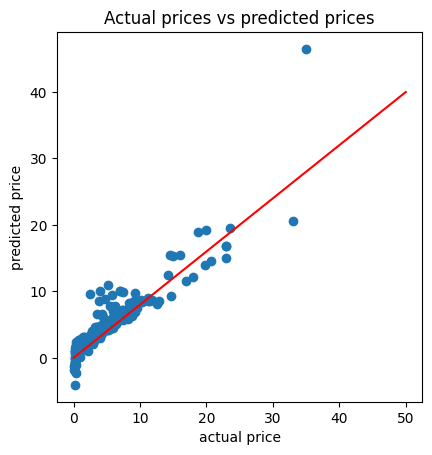

In [347]:
ax = plt.axes(aspect="equal")
plt.scatter(y_train, training2_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
_ = plt.plot([0, 50], [0, 40], c = "red")

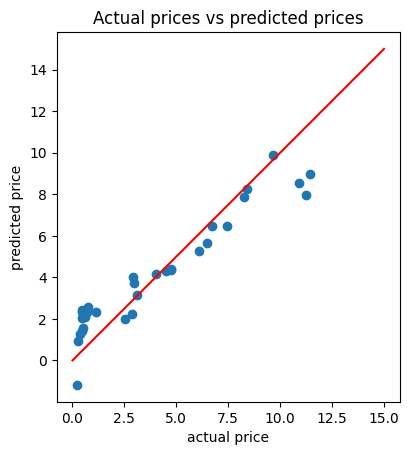

In [348]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test, test2_data_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Actual prices vs predicted prices")
_ = plt.plot([0, 15], [0, 15], c = "red")

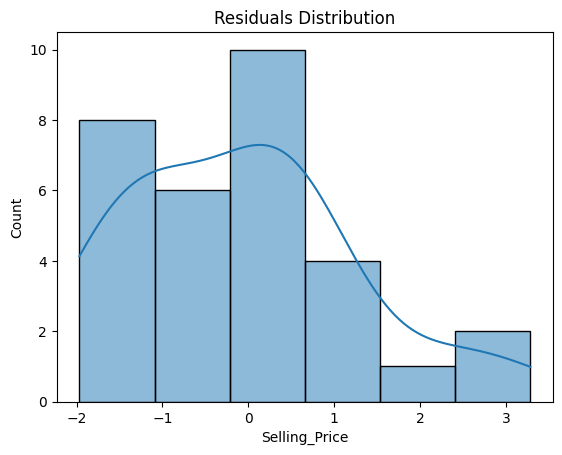

In [349]:
residuals = y_test - test2_data_prediction
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()